Ok, 2D lattice now! I'll take graphene bacuse it's cool.

In [717]:
import numpy as np
import matplotlib.pyplot as plt

In [718]:
nkx = 20 # how do I know this??? - however many points you'd like to have on the plot
nky = 20
nk = nkx*nky 
eps_0 = 0
t = 0.5
delta = 0
a = 2

In [719]:
kx = np.linspace(-np.pi/a, np.pi/a, nkx)
ky = np.linspace(-np.pi/a, np.pi/a, nky)
kx, ky = np.meshgrid(kx, ky)

kvec = np.zeros((nk, 2))
n = 0
m = 1
for i in range(nkx):
    kvec[n*nkx:m*nkx, 0] = kx[n]
    kvec[n*nky:m*nky, 1] = ky[n]
    n += 1
    m += 1

In [720]:
kvec

array([[-1.57079633, -1.57079633],
       [-1.40544935, -1.57079633],
       [-1.24010236, -1.57079633],
       [-1.07475538, -1.57079633],
       [-0.9094084 , -1.57079633],
       [-0.74406142, -1.57079633],
       [-0.57871444, -1.57079633],
       [-0.41336745, -1.57079633],
       [-0.24802047, -1.57079633],
       [-0.08267349, -1.57079633],
       [ 0.08267349, -1.57079633],
       [ 0.24802047, -1.57079633],
       [ 0.41336745, -1.57079633],
       [ 0.57871444, -1.57079633],
       [ 0.74406142, -1.57079633],
       [ 0.9094084 , -1.57079633],
       [ 1.07475538, -1.57079633],
       [ 1.24010236, -1.57079633],
       [ 1.40544935, -1.57079633],
       [ 1.57079633, -1.57079633],
       [-1.57079633, -1.40544935],
       [-1.40544935, -1.40544935],
       [-1.24010236, -1.40544935],
       [-1.07475538, -1.40544935],
       [-0.9094084 , -1.40544935],
       [-0.74406142, -1.40544935],
       [-0.57871444, -1.40544935],
       [-0.41336745, -1.40544935],
       [-0.24802047,

In [721]:
nr = 5 # for two neighbours + onsite term
# basis vectors
A1 = np.array([np.sqrt(3)*a*np.sqrt(3)/2, np.sqrt(3)*a/2])
A2 = np.array([np.sqrt(3)*a*np.sqrt(3)/2, -np.sqrt(3)*a/2])

Rvec = np.zeros((nr, 2))
Rvec[0] = np.array([0, 0])
Rvec[1] = A1
Rvec[2] = A2
Rvec[3] = -A1 
Rvec[4] = -A2 

norb = 2
HR = np.zeros((norb, norb, nr))

In [722]:
Rvec

array([[ 0.        ,  0.        ],
       [ 3.        ,  1.73205081],
       [ 3.        , -1.73205081],
       [-3.        , -1.73205081],
       [-3.        ,  1.73205081]])

In [723]:
HR

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [724]:
HR[0,0,0] = eps_0 + delta
HR[1,1,0] = eps_0 - delta
HR[0,1,0] = -t
HR[0,1,3] = -t
HR[0,1,4] = -t
HR[1,0,0] = -t
HR[1,0,1] = -t
HR[1,0,2] = -t
HR

array([[[ 0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.5,  0. ,  0. , -0.5, -0.5]],

       [[-0.5, -0.5, -0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ]]])

In [725]:
Ek = np.zeros((nk, norb), dtype=complex) # for nk-points, 2 (norb) bands

In [726]:
for ik in range(nk):
    Hk = np.zeros((norb, norb), dtype=complex)
    for ir in range(nr):
        phase = np.dot(Rvec[ir], kvec[ik])
        for iorb in range(norb):
            for jorb in range(norb):
                Hk[iorb, jorb] += HR[iorb, jorb, ir] * np.exp(-1j*phase)
    Hk = np.linalg.eig(Hk)
    for iorb in range(norb):
        Ek[ik, iorb] = Hk[0][iorb]

In [727]:
x = np.linspace(-np.pi/a, np.pi/a, 100)
y = np.linspace(-np.pi/a, np.pi/a, 100)
X, Y = np.meshgrid(x, y)
exact_plus = np.sqrt(delta**2 + t**2 * (1 + 4*np.cos(3*a*X/2)*np.cos(np.sqrt(3)*a*Y/2) + 4*(np.cos(np.sqrt(3)*a*Y/2))**2))
exact_minus = -np.sqrt(delta**2 + t**2 * (1 + 4*np.cos(3*a*X/2)*np.cos(np.sqrt(3)*a*Y/2) + 4*(np.cos(np.sqrt(3)*a*Y/2))**2))

numerical = Ek

In [728]:
len(kvec[:,0])

400

<IPython.core.display.Javascript object>


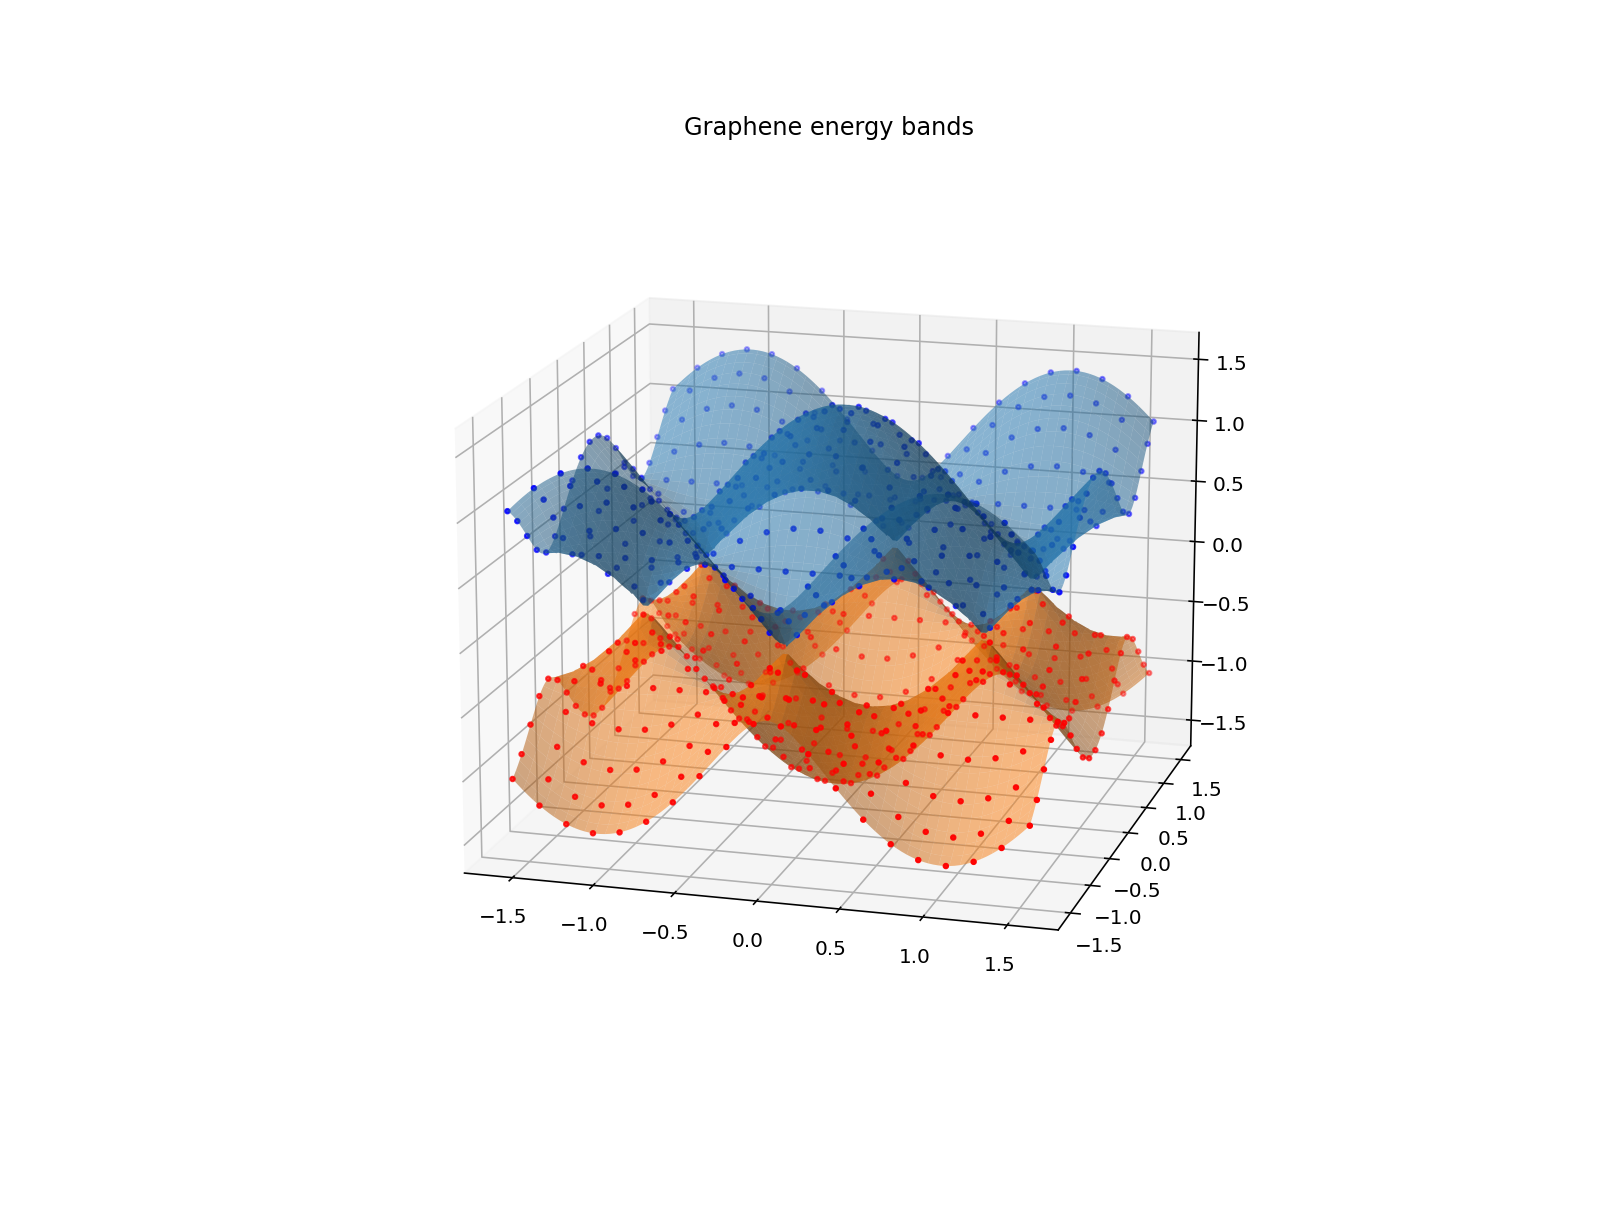

Text(0.5, 0.92, 'Graphene energy bands')

In [729]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the analytical surface
ax.plot_surface(X, Y, exact_plus, alpha=0.5)
ax.plot_surface(X, Y, exact_minus, alpha=0.5)

# plot the numerical points

ax.scatter3D(kvec[:,0], kvec[:,1], numerical[:,0], s=5, color = "blue")
ax.scatter3D(kvec[:,0], kvec[:,1], numerical[:,1], s=5, color = "red")
plt.title("Graphene energy bands")

# # fancy graph elements, all cool and noted

# xticks = np.linspace(-np.pi, np.pi, 9)
# xlabels = ['' for k in xticks]
# xlabels[0] = '$-\pi$'
# xlabels[-1] = '$\pi$'
# fig, axs = plt.subplots()
# axs.set_xlim(-np.pi, np.pi)
# axs.set_title('Tight-Binding Model Diatomic 1D Chain, $N_k$='+str(nk))
# axs.set_ylabel('$E$')
# axs.set_xlabel('$k$')
# axs.axvline(x=0., color='k')

# axs.plot(kvec, np.real(numerical[:,0]), 'ro', label='Eigenvalues of H')
# axs.plot(kvec, np.real(numerical[:,1]), 'ro')
# axs.plot(kvec, exact_plus, label='$E(k_+)$')
# axs.plot(kvec, exact_minus, label='$E(k_-)$')

# # fancy graph elemants, all cool and noted
# yticks = np.linspace((eps_A + eps_B)/2 + np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + 1)), (eps_A + eps_B)/2 - np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + 1)), 5)
# ylabels = ['' for k in yticks]
# ylabels[2] = '$\\frac{\epsilon_A + \epsilon_B}{2}$'
# axs.set_yticks(yticks)
# axs.set_yticklabels(ylabels)
# axs.set_xticks(xticks)
# axs.set_xticklabels(xlabels)
# axs.legend()
# axs.grid(True)

Ok, now I'll take the $\Gamma K M \Gamma$ slice as it is usually done in texbooks and that would be it. 

In [751]:
# Points defined
G = np.array([0, 0])
K = (2*np.pi/(3*a)) * np.array([1, 1/np.sqrt(3)])
M = (2*np.pi/(3*a)) * np.array([1, 0])


# Gamma to K
kvec1 = np.array([np.linspace(G[0], K[0], 10), np.linspace(G[1], K[1], 10)])
# K to M
kvec2 = np.array([np.linspace(K[0], M[0], 10), np.linspace(K[1], M[1], 10)])
# M to Gamma
kvec3 = np.array([np.linspace(M[0], G[0], 10), np.linspace(M[1], G[1], 10)])

In [752]:
kvecGKMG = np.zeros((10*3, 2))

In [753]:
kvecGKMG[0:10] = np.transpose(kvec1)
kvecGKMG[10:20] = np.transpose(kvec2)
kvecGKMG[20:30] = np.transpose(kvec3)
kvecGKMG

array([[0.        , 0.        ],
       [0.11635528, 0.06717775],
       [0.23271057, 0.13435551],
       [0.34906585, 0.20153326],
       [0.46542113, 0.26871102],
       [0.58177642, 0.33588877],
       [0.6981317 , 0.40306653],
       [0.81448698, 0.47024428],
       [0.93084227, 0.53742203],
       [1.04719755, 0.60459979],
       [1.04719755, 0.60459979],
       [1.04719755, 0.53742203],
       [1.04719755, 0.47024428],
       [1.04719755, 0.40306653],
       [1.04719755, 0.33588877],
       [1.04719755, 0.26871102],
       [1.04719755, 0.20153326],
       [1.04719755, 0.13435551],
       [1.04719755, 0.06717775],
       [1.04719755, 0.        ],
       [1.04719755, 0.        ],
       [0.93084227, 0.        ],
       [0.81448698, 0.        ],
       [0.6981317 , 0.        ],
       [0.58177642, 0.        ],
       [0.46542113, 0.        ],
       [0.34906585, 0.        ],
       [0.23271057, 0.        ],
       [0.11635528, 0.        ],
       [0.        , 0.        ]])

In [754]:
Ek = np.zeros((10*3, norb), dtype=complex) # for nk-points, 2 (norb) bands
for ik in range(10*3):
    Hk = np.zeros((norb, norb), dtype=complex)
    for ir in range(nr):
        phase = np.dot(Rvec[ir], kvecGKMG[ik])
        for iorb in range(norb):
            for jorb in range(norb):
                Hk[iorb, jorb] += HR[iorb, jorb, ir] * np.exp(-1j*phase)
    Hk = np.linalg.eig(Hk)
    for iorb in range(norb):
        Ek[ik, iorb] = Hk[0][iorb]

In [755]:
# Points defined
G = np.array([0, 0])
K = (2*np.pi/(3*a)) * np.array([1, 1/np.sqrt(3)])
M = (2*np.pi/(3*a)) * np.array([1, 0])

# more detailed kvec
# Gamma to K
kvec1 = np.array([np.linspace(G[0], K[0], 20), np.linspace(G[1], K[1], 20)])
# K to M
kvec2 = np.array([np.linspace(K[0], M[0], 20), np.linspace(K[1], M[1], 20)])
# M to Gamma
kvec3 = np.array([np.linspace(M[0], G[0], 20), np.linspace(M[1], G[1], 20)])

vecGKMG = np.zeros((20*3, 2))

vecGKMG[0:20] = np.transpose(vec1)
vecGKMG[20:40] = np.transpose(vec2)
vecGKMG[40:60] = np.transpose(vec3)


In [756]:
# generating numerical and analytical data
xnum = np.linspace(0, 10, 10*3)
ynum = Ek

xan = np.linspace(0, 10, 20*3)
yan1 = np.sqrt(delta**2 + t**2 * (1 + 4*np.cos(3*a*kvecGKMG[:,0]/2)*np.cos(np.sqrt(3)*a*kvecGKMG[:,1]/2) + 4*(np.cos(np.sqrt(3)*a*kvecGKMG[:,1]/2))**2))
yan2 = -np.sqrt(delta**2 + t**2 * (1 + 4*np.cos(3*a*kvecGKMG[:,0]/2)*np.cos(np.sqrt(3)*a*kvecGKMG[:,1]/2) + 4*(np.cos(np.sqrt(3)*a*kvecGKMG[:,1]/2))**2))


<IPython.core.display.Javascript object>


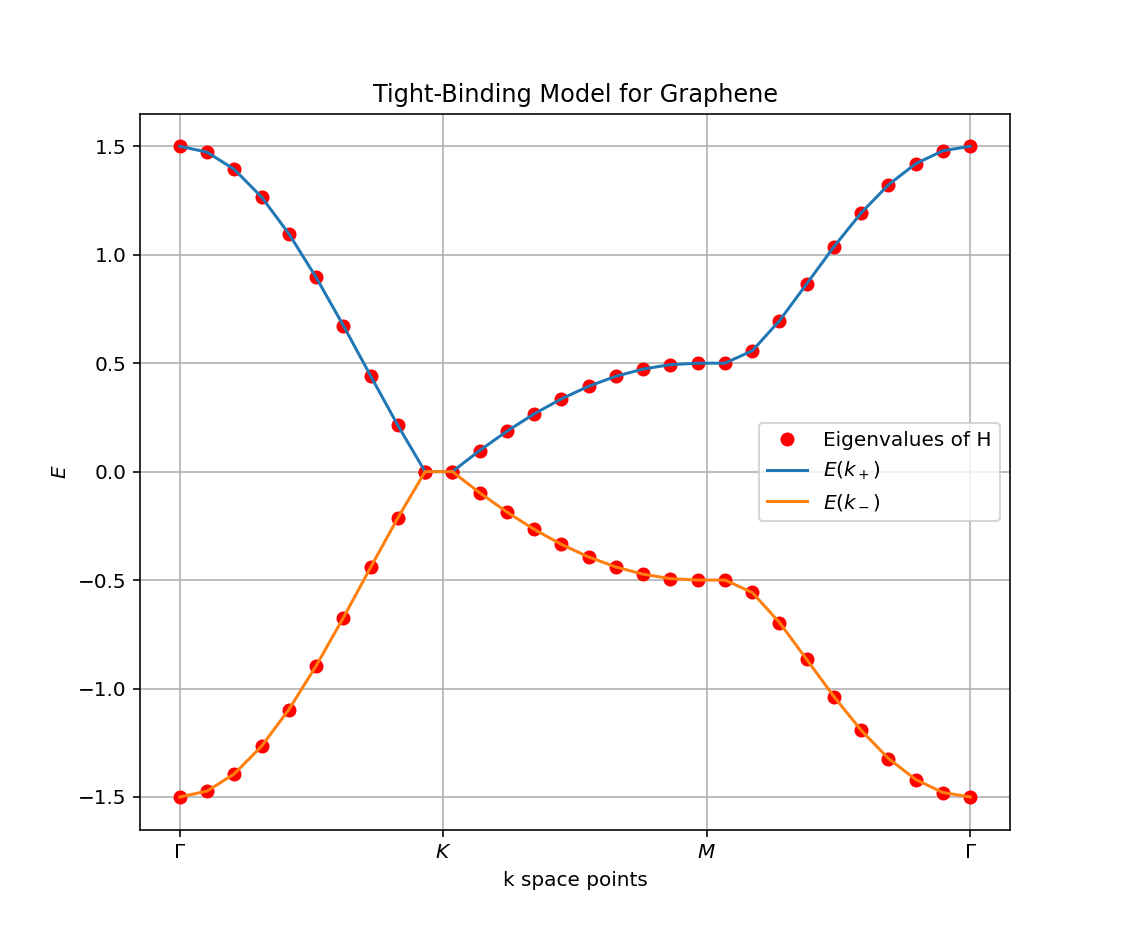

In [757]:
# plot
fig, axs = plt.subplots()

xticks = np.linspace(0, 10, 4)
xlabels = ['' for k in xticks]
xlabels[0] = '$\Gamma$'
xlabels[1] = '$K$'
xlabels[2] = '$M$'
xlabels[3] = '$\Gamma$'

axs.plot(xnum, np.real(ynum[:,0]), 'ro', label='Eigenvalues of H')
axs.plot(xnum, np.real(ynum[:,1]), 'ro')
axs.plot(xnum, yan1, label='$E(k_+)$')
axs.plot(xnum, yan2, label='$E(k_-)$')
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.set_title('Tight-Binding Model for Graphene')
axs.set_ylabel('$E$')
axs.set_xlabel('k space points')
axs.legend()
axs.grid(True)
